#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


In [ ]:
# Importamos las librerias necesarias
# ==============================================================================

# #librerias necesarias para tratamiento y manejo de datos numéricos.
# ==============================================================================
import numpy as np
import pandas as pd

#importamos las librerias necesarias para Gráficos
# ==============================================================================
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
import datetime

# Preprocesado y modelado
# scikit-learn
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.linear_model    import Ridge
from sklearn.linear_model    import RidgeCV
from sklearn.linear_model    import LassoCV
from sklearn.linear_model    import ElasticNet
from sklearn.linear_model    import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA

# scikit-learn Metricas
# ==============================================================================
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")



In [ ]:
# Conectamos acceso a nuestro drive cuenta de google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar datos a analizar
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/rrhh.csv')

# **Análisis de datos exploratorio (EDA)**

In [ ]:
# Hecha un vistazo a los datos a nivel global y vemos que tipo de variable tenemos: Variable continua (flotante), discreta (Entero), Categorica (String).
data.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
# Reviso cuantos datos No nulos tiene cada columna y tipo de dato de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
# Variable continua (flotante): 1
# discreta (Entero): 3
# Categorica (String): 2

In [ ]:
# Un resumén estadistico de nuestro dataframe
data.describe()

,Experiencia,Hijos,Casado,Salario
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000
std,2.577612,1.208823,0.491138,11520.200049
min,0.100000,0.000000,0.000000,5630.000000
25%,4.600000,0.000000,0.000000,22557.500000
50%,6.400000,1.000000,1.000000,29470.000000
75%,8.100000,2.000000,1.000000,37922.500000
max,15.200000,4.000000,1.000000,83470.000000


# **Completitud de nuestro archivo**

In [ ]:
# Chequeamos porcentaje de completitud del archivo de datos
# :.2f para aproximar a 2 decimales
# f" " corresponde a un formateo string todo lo q la procede
print(f"El % de completitud es: {data.count().sum() / data.size * 100:.2f}%")

El % de completitud es: 100.00%


# **Revisión de Duplicados en nuestro archivo**

In [ ]:
# Revisamos si hay filas duplicadas en las columnas del df

duplicados = data[data.duplicated()]
duplicados.shape

(0, 6)

In [ ]:
total_dupli = duplicados.shape[0]
print(f" Tenemos {total_dupli} filas duplicadas en nuestro dataframe")

 Tenemos 0 filas duplicadas en nuestro dataframe


In [ ]:
colum_dupli = data.columns[data.columns.duplicated(keep=False)]
if any(colum_dupli):
  print(f"las columnas duplicadas son: {list(colum_dupli)}")
else:
  print("No hay columnas duplicadas en nuestro dataframe")

No hay columnas duplicadas en nuestro dataframe


In [ ]:
# No tenemos elementos duplicados, en nuestros datos.

In [ ]:
# Analisaremos gráficamente nuestra variable objetivo Salario vs Experiencia por nuestro analisis estadistico es la más influyente en el Salario.

In [ ]:
data.corr()['Salario'].sort_values(ascending= False)[:]

<ipython-input-11-c41775dbbdc8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Salario'].sort_values(ascending= False)[:]


Salario        1.000000
Experiencia    0.663780
Hijos          0.211630
Casado         0.085462
Name: Salario, dtype: float64

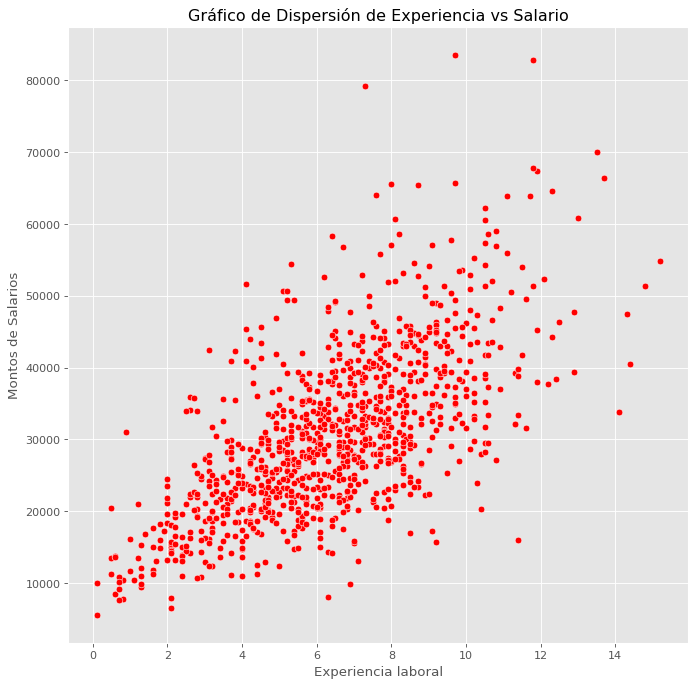

In [ ]:
# Visualizar el gráfico de dispersión utilizando Seaborn de la columna 'Salario'
plt.figure(figsize=(10, 10), dpi=80)
sns.scatterplot(x=data["Experiencia"], y=data["Salario"], color="red")

# Agregar título y etiquetas a los ejes del gráfico de dispersión
plt.xlabel('Experiencia laboral')
plt.ylabel('Montos de Salarios')
plt.title('Gráfico de Dispersión de Experiencia vs Salario')

# Mostrar el gráfico de dispersión
plt.show()

In [ ]:
# En nuestro analisis de nuestra variable revisamos su asimetria y curtosis.
print("Asimetría: %f" % data['Salario'].skew())
print("Curtosis: %f" % data['Salario'].kurt())

Asimetría: 0.746430
Curtosis: 1.081334


In [ ]:
# Ovservaciones:
# "Asimetría" nos indica que la cola derecha de la distribución es más larga o más pesada que la cola izquierda. En otras palabras, hay valores extremadamente altos que están tirando hacia la derecha de la media.
# "curtosis leptocúrtica". Esto significa que la distribución tiene colas más delgadas y es más puntiaguda en el centro en comparación con una distribución normal.

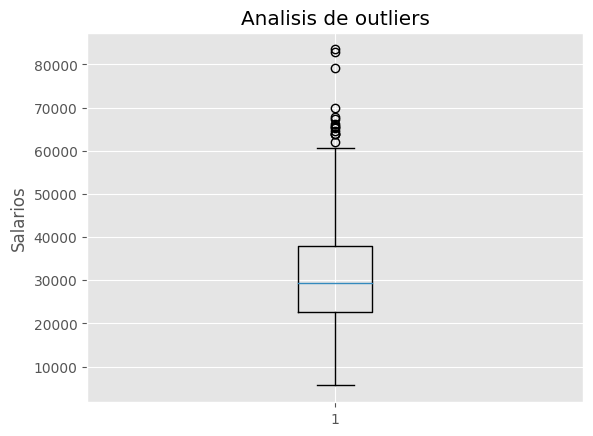

In [ ]:
# Vimos en el grafico de dispersion que tenemos varoles de salarios muy alejados, chequearemos individualmente casos atipicos con un boxplot
plt.boxplot(data["Salario"])
plt.title('Analisis de outliers')

plt.ylabel("Salarios")
plt.show();

In [ ]:
# Vemos datos atipicos en nuestra variable dependiente

# **Correlación entre las variables**

<ipython-input-17-d8b2fb581eec>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matrix = data.corr()


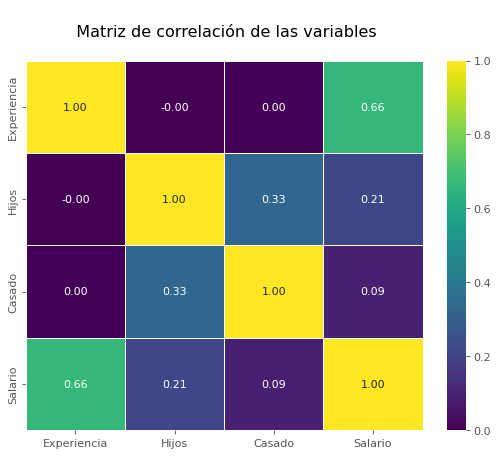

In [ ]:
# Vemos la correlacion del conjunto de variables
# Creamos nuestra matriz variable
correlacion_matrix = data.corr()

# gráfico de correlación con un mapa de colores personalizado "viridis"
# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(correlacion_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# título
plt.title("\n  Matriz de correlación de las variables \n")

# Mostrar el gráfico
plt.show();


In [ ]:
# Analisasmos nuestras columnas de variables categoricas (String)

In [ ]:
# Filtra las columnas de tipo "object"
columnas_object = data.select_dtypes(include=["object"]).columns.tolist()

# Muestra información solo de esas columnas
data_info_object = data[columnas_object].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Posicion   1000 non-null   object
 1   Educacion  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


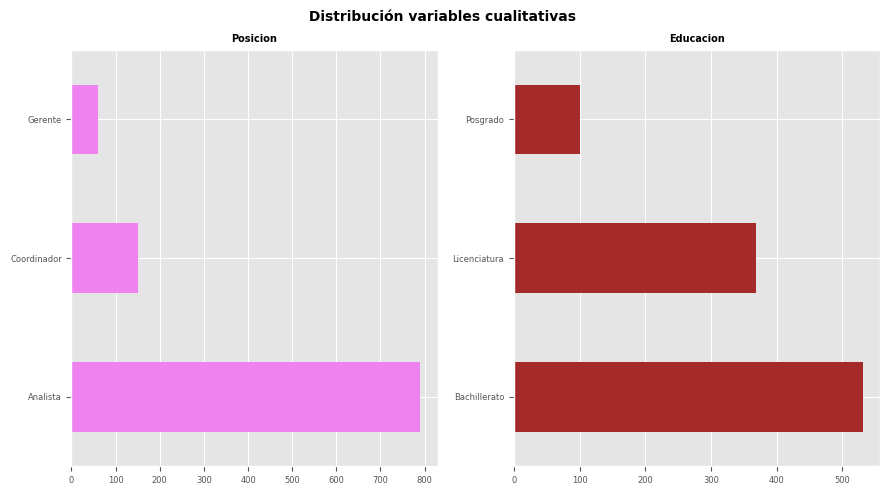

In [ ]:
import matplotlib.pyplot as plt
# Ajuste para los colores a ocupar
colors = ["violet", "brown"]

# Seleccionamos las columnas de tipo "object" en tu DataFrame y obtener sus nombres
columnas_object = data.select_dtypes(include=["object"]).columns

# Creamos una figura con dos subgráficos en una fila (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

# Iniciamos un bucle que recorre las dos primeras columnas de tipo "object"
for i, colum in enumerate(columnas_object[:2]):
    # Creamos un gráfico de barras horizontal de los conteos de valores únicos en la columna
    data[colum].value_counts().plot.barh(ax=axes[i], color=colors[i])
    # Establecer el título del subgráfico con el nombre de la columna
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    # Configurar el tamaño de las etiquetas en los ejes
    axes[i].tick_params(labelsize=6)
    # Eliminar la etiqueta del eje x para que no se muestre
    axes[i].set_xlabel("")

# Ajustar el diseño de los subgráficos dentro de la figura
fig.tight_layout()
# Ajustar la posición del título principal de la figura
plt.subplots_adjust(top=0.9)
# Establecer el título principal de la figura
fig.suptitle(" Distribución variables cualitativas  ", fontweight="bold", fontsize=10)
# Para mostramos el gráfico
plt.show()


In [ ]:
# Vemos que influyen dentro de las variables cualitativas (Categoricas) en Salario.

# **Buscamos Outliers y los eliminamos**

In [ ]:
# Pasamos a buscar en nuestras variables continuas outliers

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Revision y eliminacion de outlies numeros decimales
continuas = data.select_dtypes(include=["float"])

X = continuas.values
k = 5

# calcula la distancia euclidiana
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, indices = nbrs.kneighbors(X)
# Distancia media entre cada observación y sus k vecinos más cercanos
avg_distances = np.mean(distances[:, 1:], axis=1)
# umbral para la distancia media
threshold = np.percentile(avg_distances, 95)
# indentificar los outliers
outliers = np.where(avg_distances > threshold)[0]
# eliminar los outliers del data frame original
data = data.drop(data.index[outliers])

# Reviso cuanta información tengo despues de eliminar atipicos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  952 non-null    float64
 1   Posicion     952 non-null    object 
 2   Hijos        952 non-null    int64  
 3   Casado       952 non-null    int64  
 4   Educacion    952 non-null    object 
 5   Salario      952 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 52.1+ KB


In [ ]:
# De 1000 valores ahora pasamos a 952

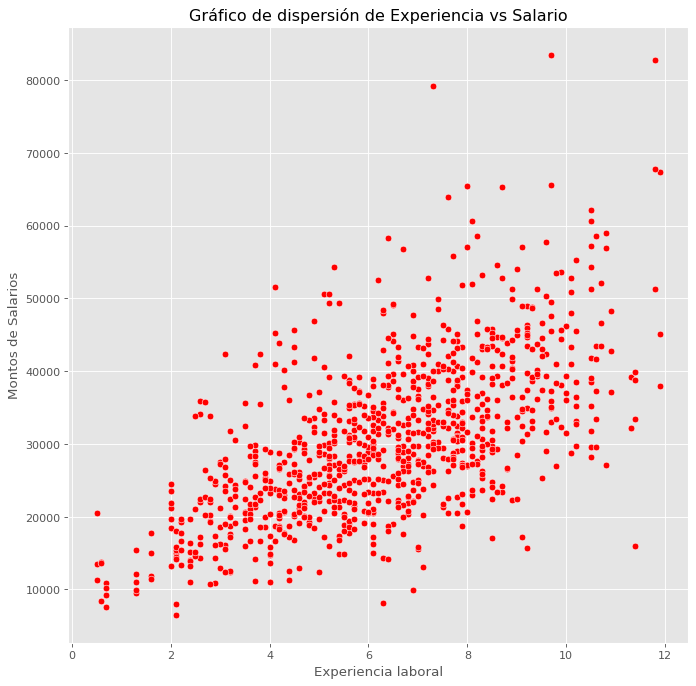

In [ ]:
# Visualizamos la columna 'Salario' ya eliminado los Outliers

# Creamos la configuración y dimensión de nuestro grafico
plt.figure(figsize=(10, 10), dpi=80)
sns.scatterplot(x=data["Experiencia"], y=data["Salario"], color="red")

# Agregar título y etiquetas a los ejes del gráfico de dispersión
plt.xlabel('Experiencia laboral')
plt.ylabel('Montos de Salarios')
plt.title('Gráfico de dispersión de Experiencia vs Salario')

# Mostrar el gráfico de dispersión
plt.show()

In [ ]:
# Covertimos variables enteras a flotantes, para unificar nustras variables para los sgtes procesos
# Buscamos todas las variables int64
int_cols = data.select_dtypes(include=["int64"]).columns
# Las transformamos a float
data[int_cols] = data[int_cols].astype(float)
# mostramos como quedaron
data.head(3)

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4.0,1.0,Bachillerato,13540.0
1,5.6,Analista,2.0,0.0,Licenciatura,31240.0
3,5.2,Analista,2.0,1.0,Licenciatura,29960.0


# **Generamos Dummies**

In [ ]:
# Trabaajeremos en nuestras variables categóricas

In [ ]:
# Crearemos variables dummy para la variable categórica "Posicion" y "Educación"
data = pd.get_dummies(data=data, columns=['Posicion', 'Educacion'])

In [ ]:
# Vemos los dummies creados esten correctamente
data.head(2)

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4.0,1.0,13540.0,1,0,0,1,0,0
1,5.6,2.0,0.0,31240.0,1,0,0,0,1,0


In [ ]:
# Mostramos nombres de columnas
data.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Salario', 'Posicion_Analista',
       'Posicion_Coordinador', 'Posicion_Gerente', 'Educacion_Bachillerato',
       'Educacion_Licenciatura', 'Educacion_Posgrado'],
      dtype='object')

In [ ]:
# Vemos como es la correlación que tienen todas las variables con la variables objetivo (Salario).
data.corr()['Salario'].sort_values(ascending= False)[:]

Salario                   1.000000
Experiencia               0.628627
Posicion_Gerente          0.409369
Hijos                     0.219984
Posicion_Coordinador      0.169220
Educacion_Posgrado        0.167801
Educacion_Licenciatura    0.141194
Casado                    0.092748
Educacion_Bachillerato   -0.238070
Posicion_Analista        -0.384729
Name: Salario, dtype: float64

In [ ]:
# Vemos que se relaciona con salario más, la columna Experiencia y la sigue la columna Posicion_Gerente
# Experiencia:  0.628627
# Posicion_Gerente:   0.409369

In [ ]:
# Vemos el indice 2 al 7 de la columna experiencia de nuestro df
data[['Experiencia']].loc[2:7]

,Experiencia
3,5.2
4,7.2
5,7.2
6,1.3
7,8.1


# **Correlación entre las variables**

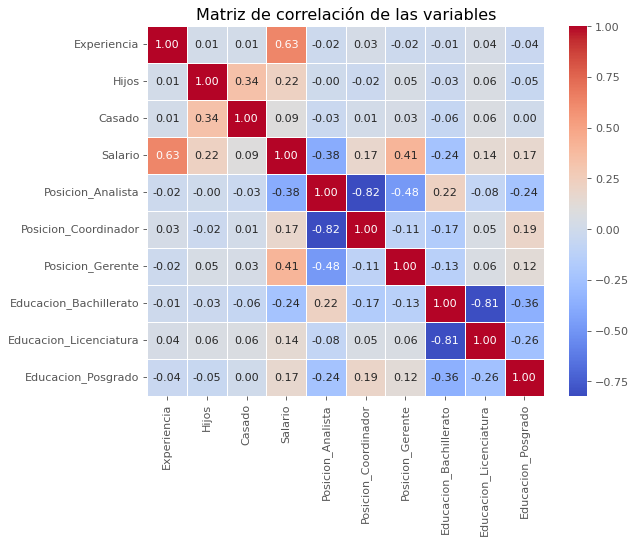

In [ ]:
# Vemos la correlacion del conjunto de variables.
# Creamos nuestra variable
correlacion_matrix = data.corr()

# gráfico de correlación con un mapa de colores personalizado "coolwarm"
# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# título
plt.title("Matriz de correlación de las variables")

# Mostrar el gráfico
plt.show();


In [ ]:
#  Se tomará la columna Salario (Nuestro valor a predecir), que será la variable objetivo o variable dependiente.

# **División de variable X e Y**




In [ ]:
# Separamos los datos a trabajar por X e Y
# Borramos de data la columna salario
X = data.drop('Salario', axis=1)
# Definimos la variable DEPENDIENTE (Salario "y")
y = data['Salario']


In [ ]:
# Vemos los valores de nuestra columna DEPENDIENTE (Salario "y")
y.head()

0    13540.0
1    31240.0
3    29960.0
4    34710.0
5    32210.0
Name: Salario, dtype: float64

In [ ]:
# Vemos el conjunto de variables INDEPENDIENTES ("X")
X.head()

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4.0,1.0,1,0,0,1,0,0
1,5.6,2.0,0.0,1,0,0,0,1,0
3,5.2,2.0,1.0,1,0,0,0,1,0
4,7.2,2.0,1.0,0,1,0,0,1,0
5,7.2,2.0,1.0,1,0,0,1,0,0


In [ ]:
# Vemos el tamaño de las variables dependiente e independientes
# cuantas filas y columnas tienen
y.shape, X.shape

((952,), (952, 9))

In [ ]:
# Nuestra variables indep tiene 9 columna, nuestra variable dependientes son 1  esta correcto lo mostrado

In [ ]:
# Vemos la cantidad de datos nuestro 100% de la variables X independientes
len(X)

952

# **División de datos para entrenamiento y prueba**

**splitear**

In [ ]:
from sklearn.model_selection import train_test_split

#Dividimos los datos en conjunto de entrenamiento (80%) y en conjunto de testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Chequeamos sean 80% los datos de entrenamiento
len(X_train)

761

In [ ]:
# Chequeamos sean 20% los datos de prueba
len(X_test)

191

# **Estandarización de datos**

In [ ]:
# Aplicamos estandarización ya que nuestros datos no tienen el mismo criterio para evaluar, es necesario realizar estandarización.

# dejamos en la variable el modelo escalar
scaler = StandardScaler()
scaler
# En esta cajita se realizan todos los calculos matemáticos y estadísticos a realizar

StandardScaler()

In [ ]:
# Estandarizar los datos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train)
# los datos de prueba no se pone fit
X_test_scaled = scaler.transform(X_test)

In [ ]:
# revizamos los datos
X_train_scaled

array([[-0.19800836, -1.18820213, -1.20616695, ...,  0.9252554 ,
        -0.74794801, -0.33793794],
       [-0.28531101, -0.38301796,  0.82907263, ...,  0.9252554 ,
        -0.74794801, -0.33793794],
       [ 1.85360377,  1.22735037,  0.82907263, ...,  0.9252554 ,
        -0.74794801, -0.33793794],
       ...,
       [-0.32896233,  0.42216621,  0.82907263, ..., -1.08078266,
        -0.74794801,  2.95912322],
       [-1.72580463, -0.38301796, -1.20616695, ...,  0.9252554 ,
        -0.74794801, -0.33793794],
       [-0.76547555, -0.38301796,  0.82907263, ..., -1.08078266,
         1.33699132, -0.33793794]])

In [ ]:
# revizamos los datos
X_test_scaled

array([[-0.85277819,  0.42216621,  0.82907263, ...,  0.9252554 ,
        -0.74794801, -0.33793794],
       [ 0.3258075 , -0.38301796,  0.82907263, ..., -1.08078266,
         1.33699132, -0.33793794],
       [-1.59485067,  0.42216621, -1.20616695, ..., -1.08078266,
         1.33699132, -0.33793794],
       ...,
       [ 0.15120221, -1.18820213, -1.20616695, ...,  0.9252554 ,
        -0.74794801, -0.33793794],
       [ 0.15120221, -0.38301796, -1.20616695, ..., -1.08078266,
        -0.74794801,  2.95912322],
       [ 0.10755089, -1.18820213, -1.20616695, ..., -1.08078266,
        -0.74794801,  2.95912322]])

# **Modelo Linea de regresión**

In [ ]:
from sklearn.linear_model import LinearRegression

# Entrenamiento del modelo lineal
# Variable con nuestro modelo de regresión
modelo_LinReg = LinearRegression()
modelo_LinReg
# En esta cajita se realizan todos los calculos matemáticos y estadísticos a realizar

LinearRegression()

In [ ]:
# Entrenar el modelo con el conjunto de entrenamiento train 80% de nuestros datos
modelo_LinReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizamos predicción con el conjunto de prueba test 20% de nuestros datos
y_pred = modelo_LinReg.predict(X_test)
y_pred

array([22489.05162838, 31090.22171254, 19803.37082393, 13986.37818183,
       40778.24753352, 14874.25568376, 17874.24988767, 25702.68423281,
       36089.38735508, 35746.94168923, 42000.30837225, 29193.92177241,
       31406.05081719, 34009.41085485, 35559.7098255 , 27876.5891081 ,
       26180.97650971, 58562.41413336, 40390.32832806, 20426.41978953,
       32038.3716826 , 25152.68413417, 24048.9898704 , 17874.24988767,
       45316.1316808 , 30856.05071855, 26886.52090205, 42441.71993017,
       42859.04403702, 38368.65595905, 19016.16832092, 51872.46338505,
       19507.41165662, 33614.95504993, 37035.13251638, 36129.78988587,
       31899.47251419, 19845.28905992, 33980.26901769, 34877.41841945,
       30856.05071855, 53928.22813283, 25466.99753363, 31487.3415563 ,
       38357.86835403, 29314.46670867, 39256.53346098, 30969.67677628,
       28572.86160063, 25824.74487427, 27304.54071082, 38419.65652736,
       36070.33742102, 32571.53325428, 18363.97751817, 21579.1258278 ,
      

In [ ]:
# Reviso la cantidad de datos sea la correcta
len(y_pred)

191

In [ ]:
# Informacion del modelo
# Modelo regersionlineal Y = A*X + B
# A = coeficiente (pendiente de la recta)
# B = interceptor (la ordenada donde corta el eje y)

# Obtiene el intercepto y los coeficientes
intercepto = modelo_LinReg.intercept_.round(2)
print(f"Intercepto: donde corta el eje Y",intercepto)


Intercepto: donde corta el eje Y 16352.36


In [ ]:
# coeficientes del modelo
print("Coeficientes: valores que acompañan la X ")
modelo_LinReg.coef_.round(2)

Coeficientes: valores que acompañan la X 


array([ 2959.59,  1715.48,   -19.87, -7831.13, -2931.16, 10762.29,
       -2465.48,  -139.72,  2605.2 ])

In [ ]:
accy = modelo_LinReg.score(X_train, y_train)
a = accy*100
print(f"Accuracy del modelo entrenamiento: ",accy.round(2))
print(" Nota:", a.round(2),"% es la exactitud, la cantidad correctamente predecida de todo nuestro conjunto de entrenamiento")

Accuracy del modelo entrenamiento:  0.66
 Nota: 66.33 % es la exactitud, la cantidad correctamente predecida de todo nuestro conjunto de entrenamiento


In [ ]:
# Imprimir los coeficientes del modelo con su nombre de columnas correpondientes
# Creamos un dataframe con 2 columnas las que necesitamos mostrar
coef_data = pd.DataFrame({"Variable": X_train.columns, "Coeficiente": modelo_LinReg.coef_.round(2)})
print(coef_data)

# Nuestro coeficiente es el valor de a para cada X en nuestra ecuación lineal de regresión
# y = a*X + b

                 Variable  Coeficiente
0             Experiencia      2959.59
1                   Hijos      1715.48
2                  Casado       -19.87
3       Posicion_Analista     -7831.13
4    Posicion_Coordinador     -2931.16
5        Posicion_Gerente     10762.29
6  Educacion_Bachillerato     -2465.48
7  Educacion_Licenciatura      -139.72
8      Educacion_Posgrado      2605.20


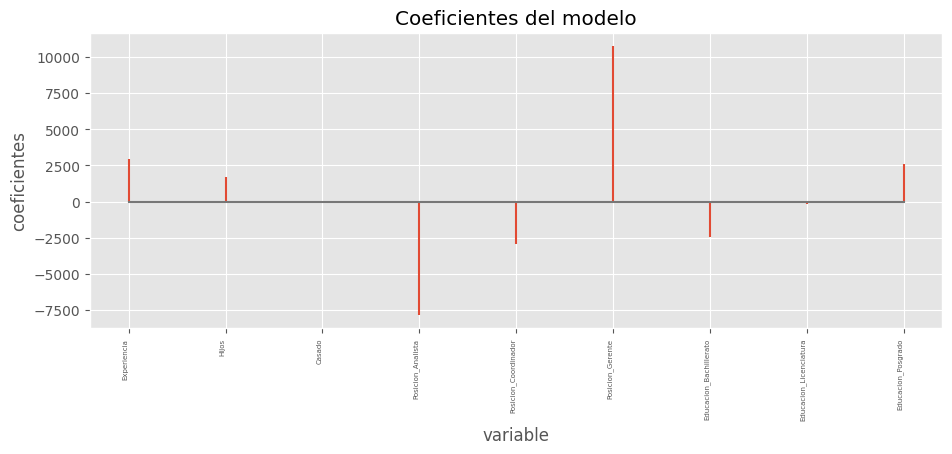

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(X_train.columns, modelo_LinReg.coef_, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

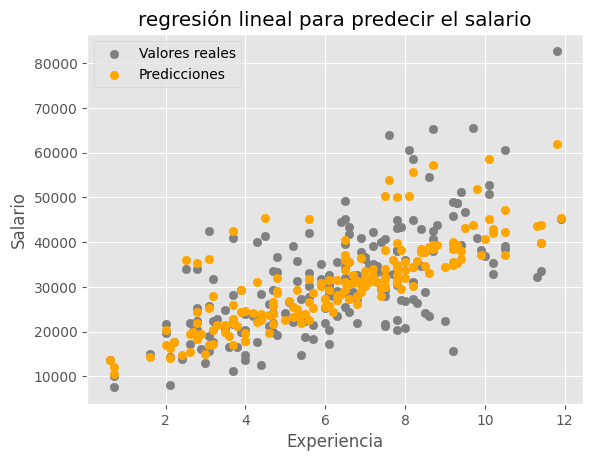

In [ ]:
# Gráfico de dispersión (scatter plot) de los valores reales en el conjunto de prueba
plt.scatter(X_test["Experiencia"], y_test, color="grey", label="Valores reales")
# Gráfico de dispersión de las predicciones en el conjunto de prueba
plt.scatter(X_test["Experiencia"], y_pred, color="orange", label="Predicciones")
# Crear una línea que conecta las predicciones (en este caso, no se verá porque linewidth=0)
plt.plot(X_test["Experiencia"], y_pred, color="orange", linewidth=0)
# Establecer la etiqueta del eje x del gráfico
plt.xlabel("Experiencia")
# Establecer la etiqueta del eje y del gráfico
plt.ylabel("Salario")
# Establecer el título del gráfico
plt.title("regresión lineal para predecir el salario")
# Agregar una leyenda al gráfico para identificar las series de datos (valores reales y predicciones)
plt.legend(loc="upper left")
plt.show();

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Buscamos que:   y_pred = y_test

# Error cuadratico medio
mse = mean_squared_error(y_test, y_pred)
# Raiz de mse
rmse = mean_squared_error(y_test, y_pred, squared=False)
# una medida de la bondad de ajuste del modelo. Varía entre 0 y 1
r2 = r2_score(y_test, y_pred)

mse_ = mse.round(2)
rmse_ = rmse.round(2)
r2_ = (r2 * 100).round(2)
#print(r2_)

print("Mean Squared Error MSE:", mse_)
print("R: Segun nuestro error (mse) de prediccion del salario puede estar alejada", mse_, "del salario predecido" "\n")
print("Root Mean Squared Error RMSE:", rmse_)
print("R: Segun nuestro error (rmse) de prediccion del sueldo puede estar alejada",rmse_, "del salario predecido" "\n")
print("R-squared R2:", r2)
print("R: Segun (R2) nuestro % de prediccion del sueldo puede variar",r2_,"% del salario predecido" "\n" )

Mean Squared Error MSE: 42176853.12
R: Segun nuestro error (mse) de prediccion del salario puede estar alejada 42176853.12 del salario predecido

Root Mean Squared Error RMSE: 6494.37
R: Segun nuestro error (rmse) de prediccion del sueldo puede estar alejada 6494.37 del salario predecido

R-squared R2: 0.7033381136721749
R: Segun (R2) nuestro % de prediccion del sueldo puede variar 70.33 % del salario predecido



In [ ]:
# Comentarios:

## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
# Importamos las librerias necesarias
#============================================================================================

# librerias necesarias para tratamiento y manejo de datos numéricos.
import numpy as np
import pandas as pd
#============================================================================================

#importamos las librerias necesarias para Gráficos
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
import datetime
#============================================================================================

# Preprocesado y modelado
# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA

# Metricas
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import classification_report
from sklearn.neighbors       import NearestNeighbors

#============================================================================================

# Configuración warnings
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")



In [ ]:
# Conectamos acceso a nuestro drive cuenta de google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar datos a analizar nuevo archivo con nueva columna Contratado
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/rrhh_2.csv')

# **Análisis de datos exploratorio (EDA)**





In [ ]:
# Hechamos un vistazo a los datos y vemos que tipo de variable tenemos en las primeras 5 posiciones:
df.head(5)

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
# Vemos las dimensiones
df.shape

(1000, 7)

In [ ]:
# Realizamos analisis que tipo de variables tenemos:
# Variable continua (flotante), discreta (Entero), Categorica (String).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
# Tenemos 1000 datos
# Tenemos las sgtes columnas:
# Variable continua (flotante): 1
# discreta (Entero): 4
# Categorica (String): 2

In [ ]:
# Un resumen estadistico
df.describe()

,Experiencia,Hijos,Casado,Salario,Contratado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000,0.518000
std,2.577612,1.208823,0.491138,11520.200049,0.499926
min,0.100000,0.000000,0.000000,5630.000000,0.000000
25%,4.600000,0.000000,0.000000,22557.500000,0.000000
50%,6.400000,1.000000,1.000000,29470.000000,1.000000
75%,8.100000,2.000000,1.000000,37922.500000,1.000000
max,15.200000,4.000000,1.000000,83470.000000,1.000000


# **Analisis multivariable**

In [ ]:
# Claves variables objetivo
df["Contratado"].value_counts()

1    518
0    482
Name: Contratado, dtype: int64

In [ ]:
# Tenemos 51,8% de datos contratados
# Tenemos 48,2% de datos No contratados

In [ ]:
# Sumo los valores 1 nos dará cuantos fueron contratados
contratados = df['Contratado'].sum()
contratados

518

In [ ]:
# La difrencia me dara cuantos no fueron contratdos
no_contratados = len(df) - contratados
no_contratados

482

In [ ]:
len(df)

1000

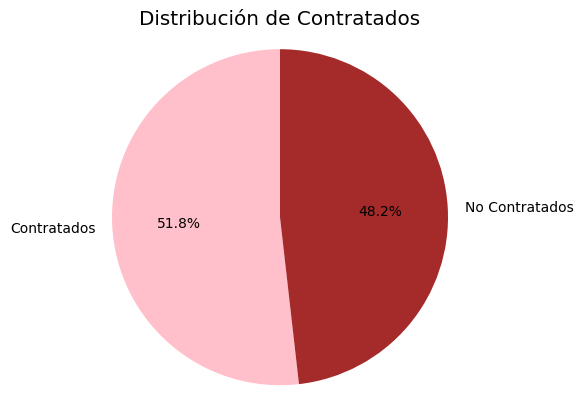

In [ ]:
# Calcular la cantidad de contratados y no contratados
contratados = df['Contratado'].sum()
# contratados = df['Contratado'].value_counts()
no_contratados = len(df) - contratados

# Lista de valores y etiquetas
sizes = [contratados, no_contratados]
labels = ['Contratados', 'No Contratados']
colors = ["pink", "brown"]

# Crear el gráfico de torta
fig, ax = plt.subplots()
# tipo de grafico
ax.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")
ax.set_title("Distribución de Contratados")

# Mostrar el gráfico
plt.show()


# **Revisión de Completitud**

In [ ]:
# Chequeamos porcentaje de completitud del archivo de datos
print(f"El % de completitud es: {df.count().sum() / df.size * 100:.2f}%")


El % de completitud es: 100.00%


# **Revisión de Filas Duplicadas**

In [ ]:
# Revisamos si hay filas duplicadas en el df
duplicados = df[df.duplicated()]
# Muestra cuantas filas duplicadas hay y cuantas columnas tiene el df
duplicados.shape

(0, 7)

In [ ]:
total_dupli = duplicados.shape[0]
print(f" Tenemos {total_dupli} filas duplicadas en nuestro dataframe")

 Tenemos 0 filas duplicadas en nuestro dataframe


In [ ]:
col_dup = df.columns[df.columns.duplicated(keep=False)]
if any(col_dup):
  print(f"las columnas duplicadas son: {list(col_dup)}")
else:
  print("No hay columnas duplicadas en nuestro dataframe")


No hay columnas duplicadas en nuestro dataframe


# **Correlación con la variable dependiente**

In [ ]:
# Veomos correlación con la columna Contratado nuestra variable dependiente y objetivo
df.corr()['Contratado'].sort_values(ascending= False)[:]

# Vemos que la columna Hijos tiene mayor correlacion con nuestra columna Contratado

<ipython-input-17-ecb929d864ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Contratado'].sort_values(ascending= False)[:]


Contratado     1.000000
Hijos          0.179465
Casado         0.101065
Salario       -0.252810
Experiencia   -0.260456
Name: Contratado, dtype: float64

# **Correlación entre las variables**



In [ ]:
# Alternativa 1 más simple
corr = df.corr()
corr.style.background_gradient(cmap="Reds")

<ipython-input-18-70ea80543ca0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Experiencia,Hijos,Casado,Salario,Contratado
Experiencia,1.000000,-0.001522,0.002578,0.663780,-0.260456
Hijos,-0.001522,1.000000,0.327876,0.211630,0.179465
Casado,0.002578,0.327876,1.000000,0.085462,0.101065
Salario,0.663780,0.211630,0.085462,1.000000,-0.252810
Contratado,-0.260456,0.179465,0.101065,-0.252810,1.000000


<ipython-input-19-ec8a146d598e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matrix = df.corr()


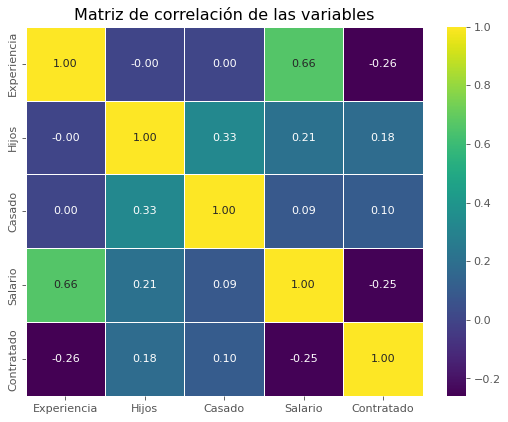

In [ ]:
# Alternativa 2 con mas detalles
# Creamos nuestra variable
correlacion_matrix = df.corr()

# gráfico de correlación con un mapa de colores personalizado "viridis"
# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(correlacion_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# título
plt.title("Matriz de correlación de las variables")

# Mostrar el gráfico
plt.show();



In [ ]:
# Buscamos las columnas decimales de caracter float
# Filtra las columnas de tipo "float"
columnas_object = df.select_dtypes(include=["float"]).columns.tolist()

# Muestra información solo de esas columnas
df_info_object = df[columnas_object].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
# Variable continua (flotante): 1 columna

# **Eliminación de Outliers (casos atípicos)**

In [ ]:
# Revision y eliminacion de outliers en los numeros decimales
# buscamos y agrupamos las columnas flotantes
continuas = df.select_dtypes(include=["float"])
# las almacenamos en una variable para manejo de datos
X = continuas.values
k = 5
# calcula la distancia euclidiana
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, indices = nbrs.kneighbors(X)
# Distancia media entre cada observación y sus k vecinos más cercanos
avg_distances = np.mean(distances[:, 1:], axis=1)
# umbral para la distancia media
threshold = np.percentile(avg_distances, 95)
# indentificar los outliers
outliers = np.where(avg_distances > threshold)[0]
# eliminar los outliers del data frame original
df = df.drop(df.index[outliers])
# Revisamos en cuanto datos quedo nuestro df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  952 non-null    float64
 1   Posicion     952 non-null    object 
 2   Hijos        952 non-null    int64  
 3   Casado       952 non-null    int64  
 4   Educacion    952 non-null    object 
 5   Salario      952 non-null    int64  
 6   Contratado   952 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 59.5+ KB


In [ ]:
# de 1000 datos bajo a 952, se eliminaron 48 outliers

In [ ]:
# Crearemos variables dummy para la variable categórica "Posicion" y "Educación"
df = pd.get_dummies(data=df, columns=['Posicion', 'Educacion'])

In [ ]:
# Vemos los dummies creados esten correctamente
df.head(2)

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,1,0,0,1,0,0
1,5.6,2,0,31240,0,1,0,0,0,1,0


In [ ]:
# Covertimos variables enteras a flotantes
int_cols = df.select_dtypes(include=["int64"]).columns
df[int_cols] = df[int_cols].astype(float)


# mostramos como quedaron
df.head(3)

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4.0,1.0,13540.0,1.0,1,0,0,1,0,0
1,5.6,2.0,0.0,31240.0,0.0,1,0,0,0,1,0
3,5.2,2.0,1.0,29960.0,1.0,1,0,0,0,1,0


In [ ]:
# Revision de nuestra informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experiencia             952 non-null    float64
 1   Hijos                   952 non-null    float64
 2   Casado                  952 non-null    float64
 3   Salario                 952 non-null    float64
 4   Contratado              952 non-null    float64
 5   Posicion_Analista       952 non-null    uint8  
 6   Posicion_Coordinador    952 non-null    uint8  
 7   Posicion_Gerente        952 non-null    uint8  
 8   Educacion_Bachillerato  952 non-null    uint8  
 9   Educacion_Licenciatura  952 non-null    uint8  
 10  Educacion_Posgrado      952 non-null    uint8  
dtypes: float64(5), uint8(6)
memory usage: 50.2 KB


In [ ]:
# Mostramos nombre4s de columnas
df.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Salario', 'Contratado',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente',
       'Educacion_Bachillerato', 'Educacion_Licenciatura',
       'Educacion_Posgrado'],
      dtype='object')

# **Correlación entre las variables** (**sin casos atípicos**)


In [ ]:
# Vemos como es la correlación que tienen con la variables objetivo (Contratado).
df.corr()['Contratado'].sort_values(ascending= False)[:]

# Vemos que la columna Educacion_Postgrado es la que tiene mayor correacion ahora

Contratado                1.000000
Educacion_Posgrado        0.185380
Hijos                     0.178108
Casado                    0.110894
Educacion_Licenciatura    0.110210
Posicion_Coordinador      0.103409
Posicion_Gerente         -0.014731
Posicion_Analista        -0.082659
Educacion_Bachillerato   -0.218806
Salario                  -0.271127
Experiencia              -0.287780
Name: Contratado, dtype: float64

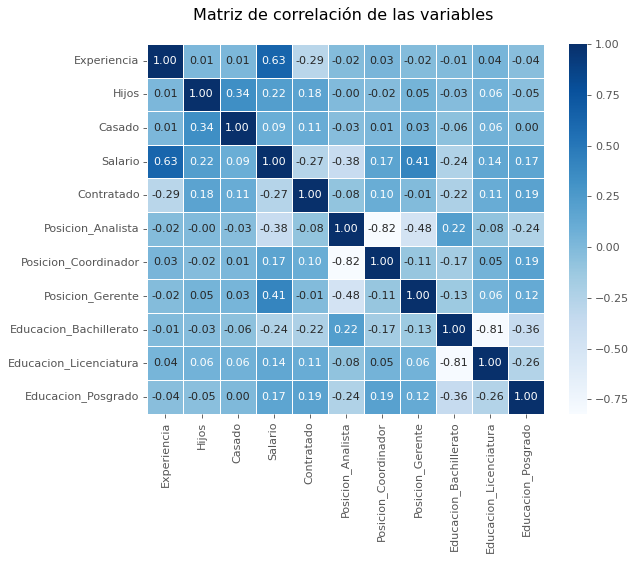

In [ ]:
# Creamos nuestra variable
correlacion_matrix = df.corr()

# gráfico de correlación con un mapa de colores personalizado
# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(correlacion_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# título
plt.title("Matriz de correlación de las variables \n")

# Mostrar el gráfico
plt.show();


In [ ]:
#df['Contratado']

0      1.0
1      0.0
3      1.0
4      1.0
5      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: Contratado, Length: 952, dtype: float64

In [ ]:
#df.head(2)

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4.0,1.0,13540.0,1.0,1,0,0,1,0,0
1,5.6,2.0,0.0,31240.0,0.0,1,0,0,0,1,0


In [ ]:
df.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Salario', 'Contratado',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente',
       'Educacion_Bachillerato', 'Educacion_Licenciatura',
       'Educacion_Posgrado'],
      dtype='object')

# **División de variable X e Y**

In [ ]:
# Separamos los datos a trabajar por X e Y
# Borramos del df la columna Contratado asi dejaremos solos nuestras variables independientes
X = df.drop("Contratado", axis=1)

# Definimos la variable DEPENDIENTE (Contratado "y")
y = df["Contratado"]


In [ ]:
X.head(3)


,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4.0,1.0,13540.0,1,0,0,1,0,0
1,5.6,2.0,0.0,31240.0,1,0,0,0,1,0
3,5.2,2.0,1.0,29960.0,1,0,0,0,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experiencia             952 non-null    float64
 1   Hijos                   952 non-null    float64
 2   Casado                  952 non-null    float64
 3   Salario                 952 non-null    float64
 4   Posicion_Analista       952 non-null    uint8  
 5   Posicion_Coordinador    952 non-null    uint8  
 6   Posicion_Gerente        952 non-null    uint8  
 7   Educacion_Bachillerato  952 non-null    uint8  
 8   Educacion_Licenciatura  952 non-null    uint8  
 9   Educacion_Posgrado      952 non-null    uint8  
dtypes: float64(4), uint8(6)
memory usage: 42.8 KB


In [ ]:
y.head(3)


0    1.0
1    0.0
3    1.0
Name: Contratado, dtype: float64

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 952 entries, 0 to 999
Series name: Contratado
Non-Null Count  Dtype  
--------------  -----  
952 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [ ]:
len(X)

952

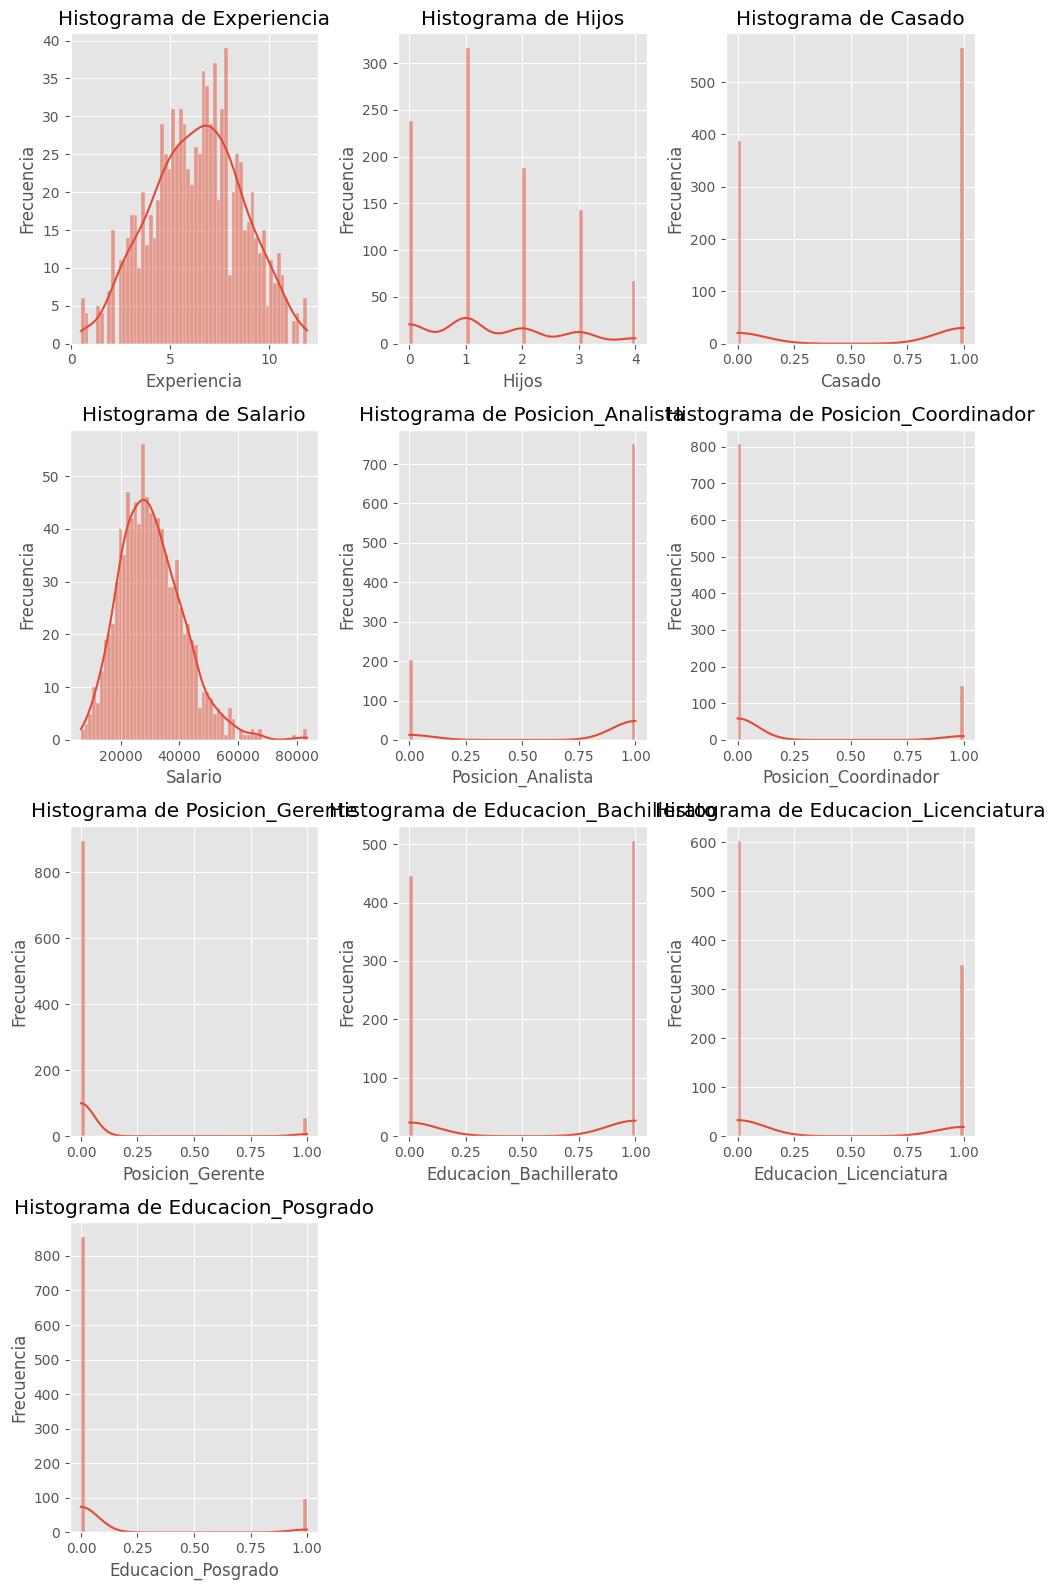

In [ ]:
# Calcula cuántas filas y columnas necesitas
num_cols = len(X.columns)
num_rows = int(num_cols / 3) + 1  # Puedes ajustar el número de columnas por fila según tu preferencia

# Creamos un grafico con el número adecuado de filas y columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 4 * num_rows))

# Aseguramos sea una matriz bidimensional
axes = axes.flatten()

# Itera a través de las columnas y traza histogramas con KDE
for i, col in enumerate(X.columns):
    sns.histplot(data=X, x=col, kde=True, bins=60, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Elimina los ejes vacíos si hay menos de 3 columnas en la última fila
if num_cols % 3 != 0:
    for i in range(num_cols % 3, 3):
        fig.delaxes(axes[-i])

# Ajustar el diseño de los subplots y espaciarlos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


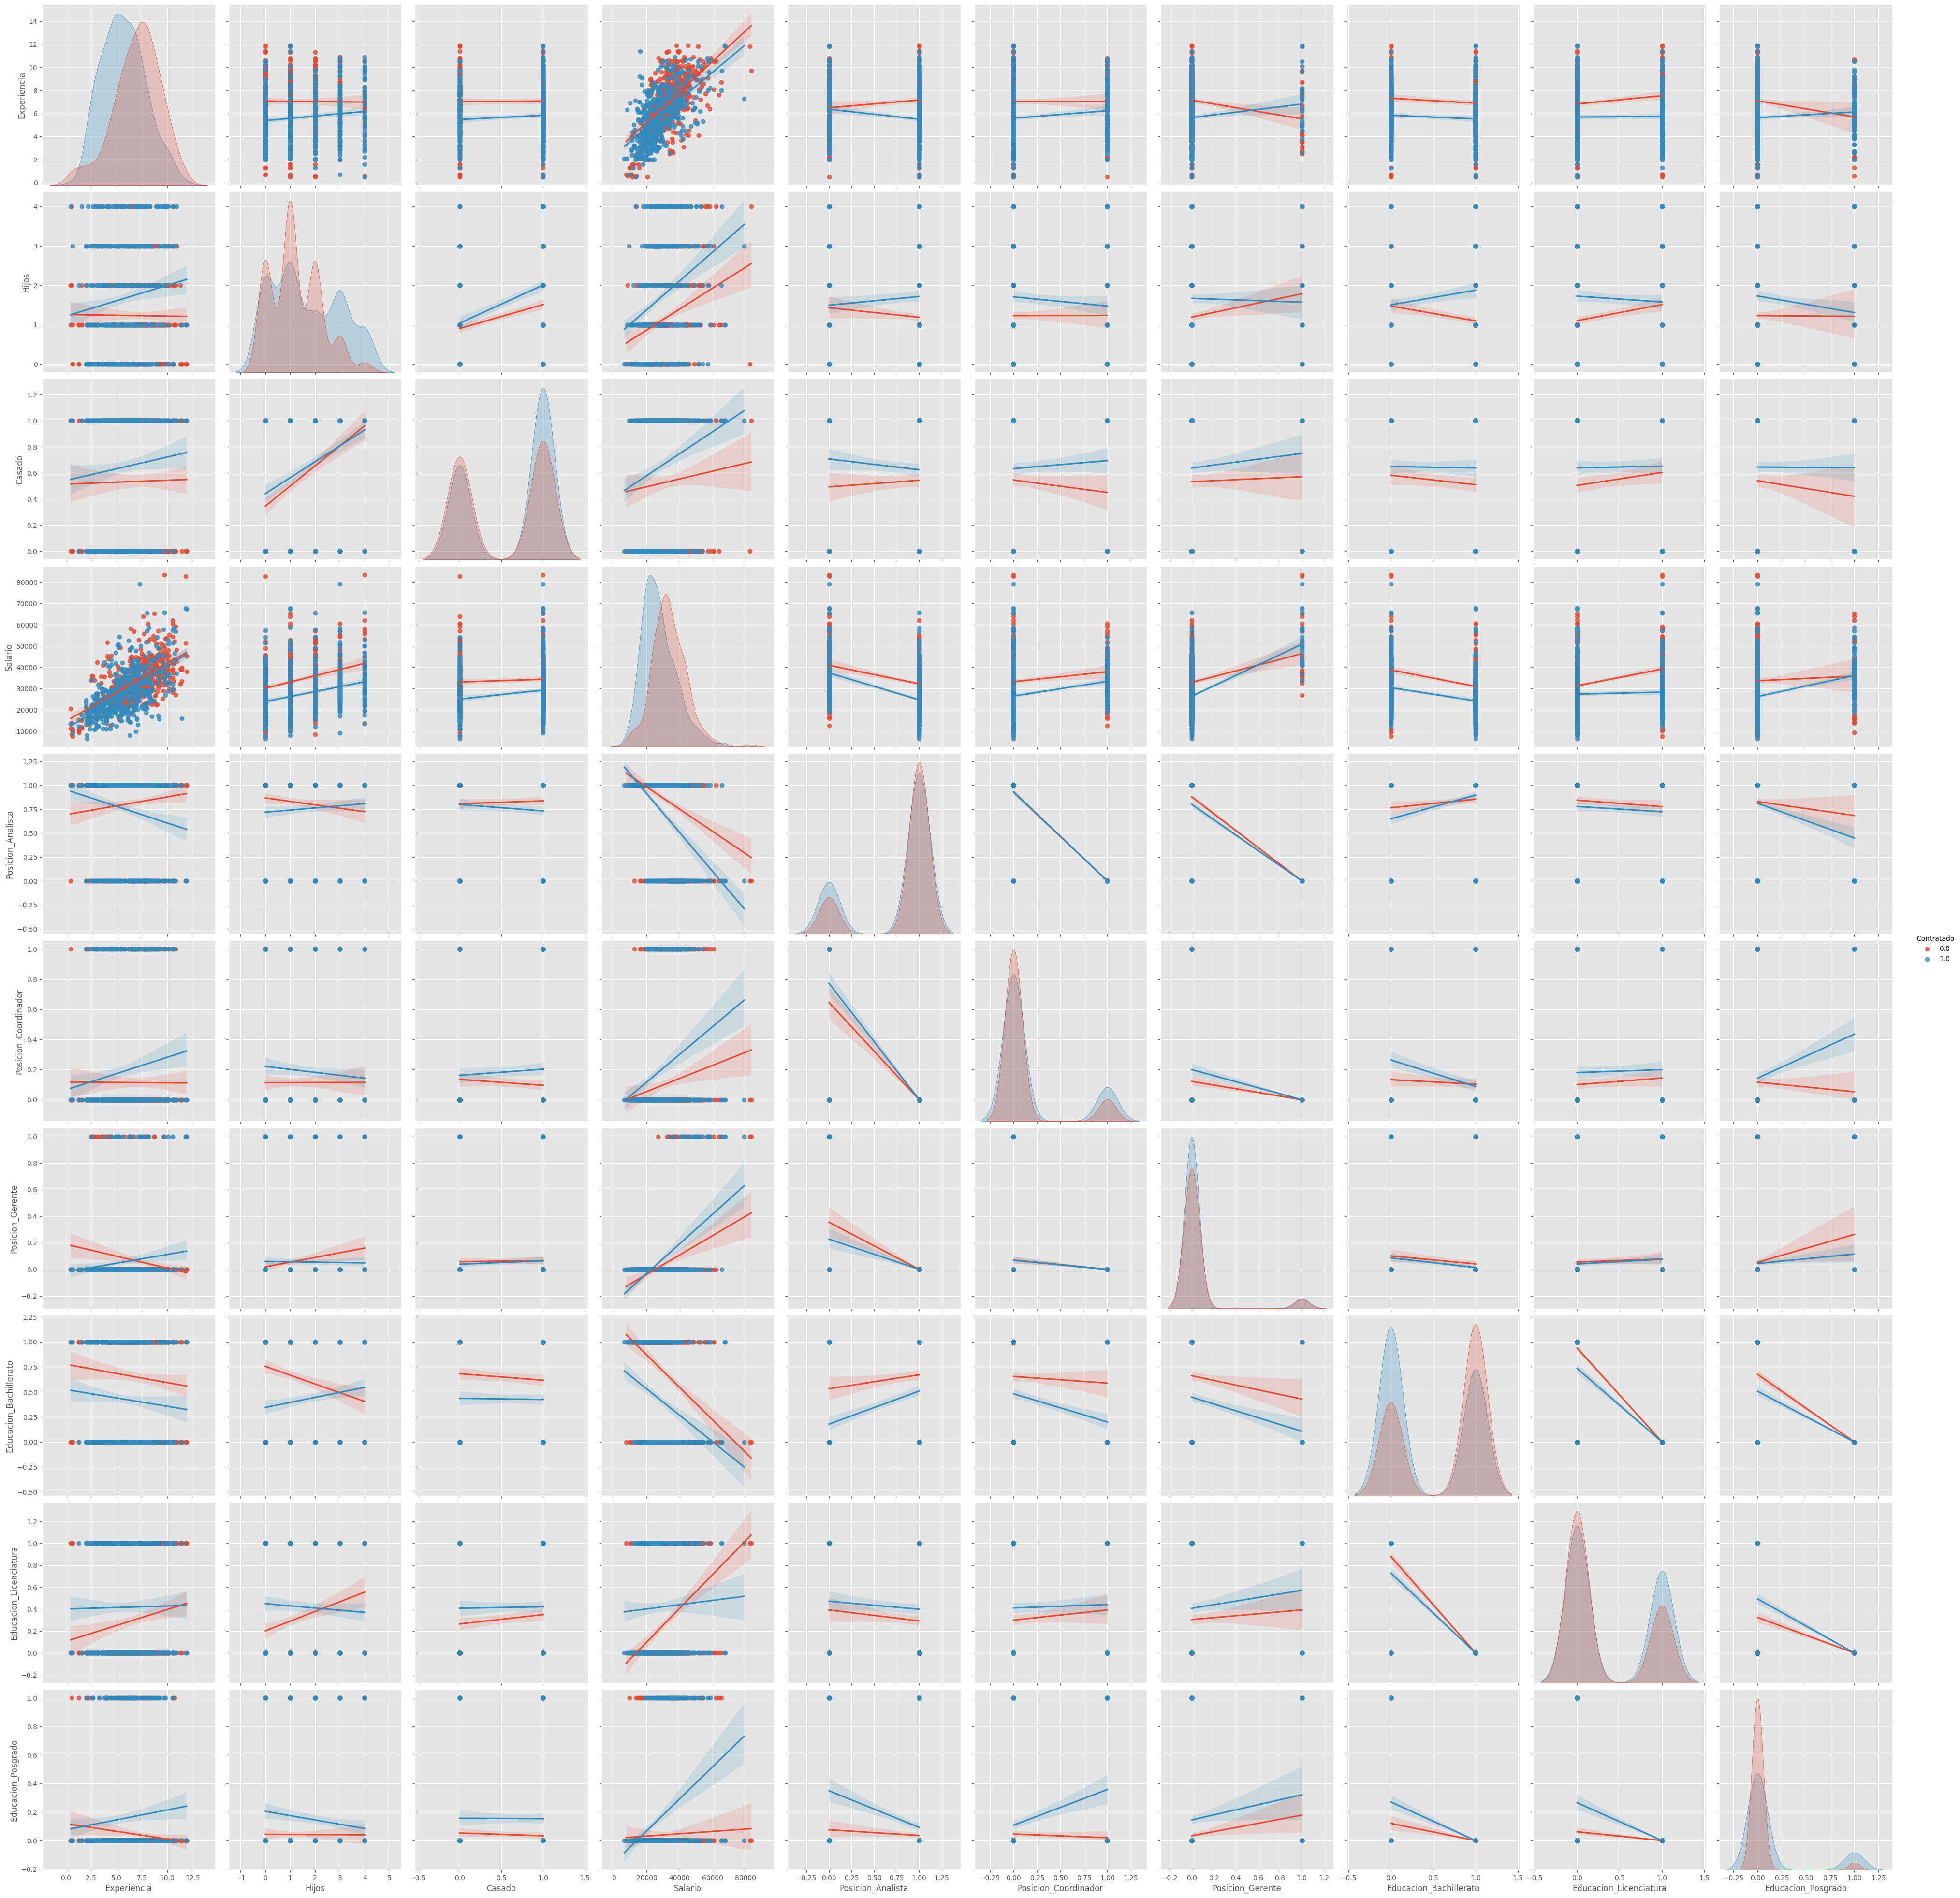

In [ ]:
# Acontinuacion mostramos cómo se relacionan las variables especificadas con respecto a la variable "Contratado", utilizando gráficos de dispersión con líneas de regresión
sns.pairplot(df.dropna(),
            hue="Contratado", size=4,
            vars=['Experiencia', 'Hijos', 'Casado', 'Salario', 'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente',
       'Educacion_Bachillerato', 'Educacion_Licenciatura',
       'Educacion_Posgrado'], kind="reg");

# **División de datos para entrenamiento y prueba**

**splitear**

In [ ]:
# importamos train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split

#Dividimos los datos en: conjunto de entrenamiento (80%) y en conjunto de testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vemos coincida con el 80% de los datos nuestra variable entranamiento
len(X_train)

761

In [ ]:
# vemos coincida con el 20% de los datos nuestra variable de prueba
len(X_test)

191

# **Estandarización de datos**

In [ ]:
# importamos StandardScaler de la libreria sklearn
from sklearn.preprocessing import StandardScaler

# Creamos nuestra variable con la estandarización para llamarla posteriormente
scaler = StandardScaler()
scaler
# en esta cajita se guardan todos los calculos matematicos y estadisticos

StandardScaler()

In [ ]:
# estandarizamos nuestras variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Modelo Regresión Lógistica**

In [ ]:
# importamos LogisticRegression de la libreria sklearn
from sklearn.linear_model import LogisticRegression

# Creamos nustra variable con la estandarización para llamarla posteriormente
logistic_model = LogisticRegression()
logistic_model
# en esta cajita se guardan todos los calculos matematicos y estadisticos de nuestra regresion logistica

LogisticRegression()

In [ ]:
# entrenamos nustro modelo de regrsion logistica
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# realizamos la prediccón con nuestro conjunto de variables de prueba
y_pred = logistic_model.predict(X_test)

In [ ]:
# Nuestra prediccion
y_pred

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:
# Recordemos que los valores para nuestra variable contratado pueden ser 2:
# 0 = corresponde a no contrados
# 1 = contrados

# Imprimimos reporte de de clasificacion de nuestro modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.71      0.67        92
         1.0       0.70      0.63      0.66        99

    accuracy                           0.66       191
   macro avg       0.67      0.67      0.66       191
weighted avg       0.67      0.66      0.66       191



In [ ]:
# importamos confusion_matrix de la libreria sklearn
# importamos accuracy_score de la libreria sklearn
from sklearn.metrics import confusion_matrix, accuracy_score

# Creamos la matrix de confusion
confusion = confusion_matrix(y_test, y_pred)
# Calcular la precision del modelo
accuracy = accuracy_score(y_test, y_pred)
# para transformar de unidad a %
acc = accuracy*100

print("Matriz de confusión:")
print(confusion, "\n")
print("La Precisión es del:", acc.round(1),"% (el modelo clasificó correctamente en el 66,5% de las muestras en el conjunto de prueba.)", "\n")
print("Podemos decir de nuestra matrix de confusión los sgte.", "\n")
print("V+ (verdaderos positivos): El predijo correctamente 65 de 92 de ellos como contratados . ")
print("F+ (falsos positivos): El modelo también predijo incorrectamente 27 postulantes de 92 como contratados cuando en realidad no lo fueron . ")
print("F- (Falsos negativos ): El modelo predijo incorrectamente 37 de 99 de ellos como no contratados, cuando fueron contratados.")
print("V- (verdaderos negativos): El modelo también predijo correctamente 62 de 99 postulantes como no contratados cuando en realidad no lo fueron.")

Matriz de confusión:
[[65 27]
 [37 62]] 

La Precisión es del: 66.5 % (el modelo clasificó correctamente en el 66,5% de las muestras en el conjunto de prueba.) 

Podemos decir de nuestra matrix de confusión los sgte. 

V+ (verdaderos positivos): El predijo correctamente 65 de 92 de ellos como contratados . 
F+ (falsos positivos): El modelo también predijo incorrectamente 27 postulantes de 92 como contratados cuando en realidad no lo fueron . 
F- (Falsos negativos ): El modelo predijo incorrectamente 37 de 99 de ellos como no contratados, cuando fueron contratados.
V- (verdaderos negativos): El modelo también predijo correctamente 62 de 99 postulantes como no contratados cuando en realidad no lo fueron.


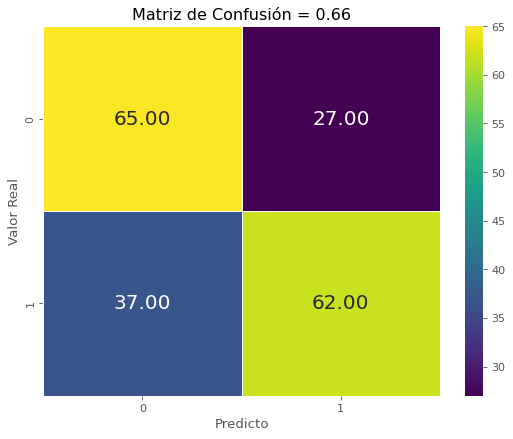

In [ ]:
# gráfico de correlación con un mapa de colores personalizado "viridis"
# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(confusion, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, annot_kws={"size": 18})

# título
plt.title(f"Matriz de Confusión = {accuracy:.2f}")
plt.xlabel("Predicto")
plt.ylabel("Valor Real")
#plt.grid(True)

# Mostrar el gráfico
plt.show();

# **Curva ROC y AUC**

Sin entrenar: ROC AUC=0.500 

Área bajo la curva
Logistic: ROC AUC=0.668


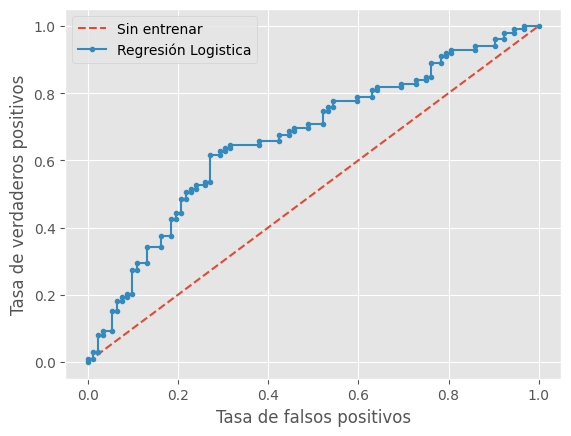

In [ ]:
# Generación de la curva ROC y AUC

# Dividimos los datasets en TRAIN y TEST
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generamos una predicción sin entrenamiento
ns_probabilidad = [0 for _ in range(len(y_test))]

# Se entrena el modelo de regresion logistica
modelo = LogisticRegression(solver='lbfgs')
modelo.fit(X_train, y_train)

# Predecimos las probabilidades
lr_probs = modelo.predict_proba(X_test)

# Mantenemos las probabilidades solo para los resultados positivos
lr_probs = lr_probs[:, 1]

# Calculamos las puntuaciones del área bajo la curva
ns_AUC = roc_auc_score(y_test, ns_probabilidad)
lr_AUC = roc_auc_score(y_test, lr_probs)

# Imprimimos los puntajes
print('Sin entrenar: ROC AUC=%.3f' % (ns_AUC), "\n")
print("Área bajo la curva")
print('Logistic: ROC AUC=%.3f' % (lr_AUC))

# Calculamos las curvas
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probabilidad)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Graficamos la curva ROC para el modelo
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logistica')

# Colocamos etiquetas
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

# Mostrar la gráfica
plt.legend()
plt.show()



In [ ]:
# El área bajo la curva se asemeja a valores reales dentrando en un modelo de rendimiento subóptimo con un AUROC=0.668

# Escala
# El peor AUROC es 0,5 y el mejor AUROC es 1,0.
# Un AUROC de 0,5 (área bajo la línea discontinua en la figura anterior), un modelo inútil.
# Un AUROC inferior a 0,7 es un rendimiento subóptimo (eL QUE TENEMOS EN LA GRAFICA)
# Un AUROC de 0,70 – 0,80 es un buen rendimiento
# Un AUROC superior a 0,8 es un rendimiento excelente
# Un AUROC de 1,0 corresponde a un clasificador perfecto